loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


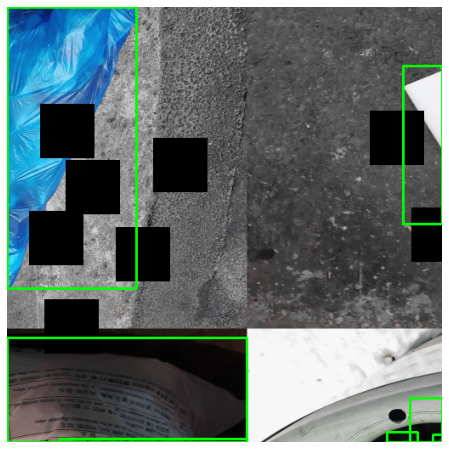

In [11]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import cv2

from dataset import TrainDataset
from transform import get_train_transform

annotation = '../../../stratified_kfold/cv_train_1.json'
data_dir = '../../../detection/dataset'
train_dataset = TrainDataset(annotation, data_dir, get_train_transform())

# train_data_loader = DataLoader(
#     train_dataset,
#     batch_size=1,
#     shuffle=False,
#     num_workers=4
# )

image, target, img_id = train_dataset[1]
boxes = target['boxes'].cpu().numpy().astype(np.int32)

numpy_image = image.permute(1,2,0).cpu().numpy()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(numpy_image, (box[1], box[0]), (box[3],  box[2]), (0, 1, 0), 2)
    
ax.set_axis_off()
ax.imshow(numpy_image);